**UNIDAD 7**
### La Ciencia de Datos: Análisis, Minería y Visualización de Datos
## Caso Práctico Unidad 7

# Introducción
Gran parte de la actividad financiera se basa en la relación entre dos conceptos fundamentales: la rentabilidad y el riesgo. Ambos son conceptos muy susceptibles de ser tratados de manera científica y, para ambos, se genera constantemente gran cantidad de datos, así que no es sorprendente que la ciencia de datos tenga mucho que decir, desde hace mucho tiempo, en este campo.

En este caso, se analiza un ejemplo del mercado bancario: la estimación del riesgo de impago de créditos.

Para ello, se proporciona un conjunto de datos demográficos y económicos de mil clientes bancarios, y un indicador de si dejaron deudas impagadas. Se trata de datos sobre un banco alemán en 1994, y la fuente original es UCI Machine Learning Repository del School of Information and Computer Science, de la Universidad de California.

Estos datos se proporcionan para su acceso local en `credit_g.csv`.

Como parte del conjunto de datos, se proporciona una tabla de coste (la idea es que el error de considerar como bueno a un cliente que finalmente no paga su crédito es mucho más costoso que el de considerar malo a un cliente que sí lo pagaría: en el primer caso, el banco puede perder todo lo prestado, mientras que en el segundo, solo se pierde el margen que habría generado ese préstamo):

![](CPresumen1.png)

Para el siguiente caso práctico, se solicitan los siguientes:

1. Cargar los datos y realizar un análisis exploratorio y una evaluación de la calidad de los datos necesarios para el resto del caso.
2. Analizar, con la ayuda de visualizaciones, cuáles de las variables proporcionadas tienen más impacto en la probabilidad de impago.
3. Basándose en los resultados del punto anterior, elaborar criterios sencillos de decisión sobre si conceder el crédito que solicita el cliente o no.
4. Valorar el coste de los errores cometidos siguiendo esos modelos, según la tabla de coste proporcionada.

# Análisis del Archivo de Datos

Comenzaremos por lo más sencillo que es cargar los datos en memoria y revisar. 

In [1]:
# Leer datos como df
import pandas as pd
import numpy as np
creditos = pd.read_csv("credit-g.csv")
creditos.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


Leer el sumario de los datos nos da algunas pistas de la estructura de los mismos. Pero no nos cuenta la historia completa. Veamos unos 10 movimientos para entender como funciona. 

In [2]:
creditos.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
5,'no checking',36,'existing paid',education,9055,'no known savings','1<=X<4',2,'male single',none,...,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
6,'no checking',24,'existing paid',furniture/equipment,2835,'500<=X<1000','>=7',3,'male single',none,...,'life insurance',53,none,own,1,skilled,1,none,yes,good
7,'0<=X<200',36,'existing paid','used car',6948,'<100','1<=X<4',2,'male single',none,...,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
8,'no checking',12,'existing paid',radio/tv,3059,'>=1000','4<=X<7',2,'male div/sep',none,...,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good
9,'0<=X<200',30,'critical/other existing credit','new car',5234,'<100',unemployed,4,'male mar/wid',none,...,car,28,none,own,2,'high qualif/self emp/mgmt',1,none,yes,bad


Obviamente hay muchas variables categóricas y no numéricas en el archivo y por eso no se ven en el reporte sumario. 

In [3]:
creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

Analicemos un poco algunas de estas variables para determinar cómo influyen y cómo mejor utilizarlas para concluir una regla heurística que nos permita evaluar si un crédito es bueno o malo. Comencemos con la primera, `checking_status`. 

In [4]:
print(creditos.checking_status.unique())

["'<0'" "'0<=X<200'" "'no checking'" "'>=200'"]


In [5]:
print(creditos.credit_history.unique())

["'critical/other existing credit'" "'existing paid'"
 "'delayed previously'" "'no credits/all paid'" "'all paid'"]


Podemos ver que cada una de estas variables categóricas no tienen necesariamente un orden específico, y en algunas inclusive la información se repite. Lo ideal sería contar con alguna función que nos permita analizar una variable y determinar cuantos casos en cada ocasión tuvieron créditos que se pagaron y cuántos no. Esta función es totalmente explorativa, no necesitamos ninguna estructura especial, sino solo contar y reportar los datos por ahora. 

In [6]:
def analizar(variable):
    instancias = creditos[variable].unique()
    print("Ocurrencias Negativas de Variable", variable)
    print((len(variable) + 34)*"¨")
    
    for cosas in instancias:     
        malos = creditos[(creditos[variable] == cosas) & (creditos['class'] == "bad")]
        malos = malos['class'].value_counts()
        malos = int(malos)
        print("--> clase ", '{:>15}'.format(cosas), " es igual a ", malos)
        

In [7]:
analizar('checking_status')

Ocurrencias Negativas de Variable checking_status
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
--> clase             '<0'  es igual a  135
--> clase       '0<=X<200'  es igual a  105
--> clase    'no checking'  es igual a  46
--> clase          '>=200'  es igual a  14


Antes de seguir avanzando, debemos establecer una barrera para saber que son muchos casos malos para atribuirle valor a nuestra fórmula heurística. Analicemos cuantos casos de los 1,000 son créditos morosos. 

In [8]:
total_malos = creditos[creditos['class'] == "bad"]
total_malos = total_malos['class'].value_counts()
total_malos = int(total_malos)
print("Total de créditos morosos ", total_malos)

Total de créditos morosos  300


Solo a modo de completar la comprensión del juego de datos, adjuntamos la descripción de los campos. 

**Attribute description** 
1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,…)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,…) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,…)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)

# Funciones de Apoyo

Comencemos por la primera variable, el estatus de la cuenta corriente de banco. Esta variable es categórica y podemos utilizar nuestra función para el análisis. 

In [9]:
analizar('checking_status')

Ocurrencias Negativas de Variable checking_status
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
--> clase             '<0'  es igual a  135
--> clase       '0<=X<200'  es igual a  105
--> clase    'no checking'  es igual a  46
--> clase          '>=200'  es igual a  14


Por lo que vemos las cuentas entre cero a doscientos marcos, y las menores de 200 marcos, tienen alta cantidad de casos morosos. Tratemos de visualizar esta variable categórica de alguna manera. Para tal fin contamos con la función `countplot()` de **Seaborn**.

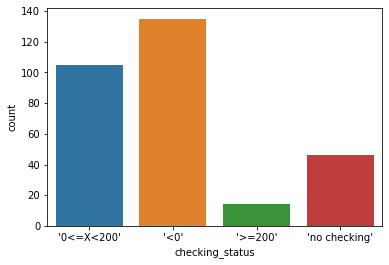

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
total_malos = creditos[creditos['class'] == "bad"]
sns.countplot(x='checking_status', data=total_malos)

Dado que tendremos que visualizar esto bastantes veces, vamos a crear una función que lo haga automáticamente. 

In [11]:
def visual_class(target):
    total_malos = creditos[creditos['class'] == "bad"]
    sns.countplot(x=target, data=total_malos)

Veamos si funciona:

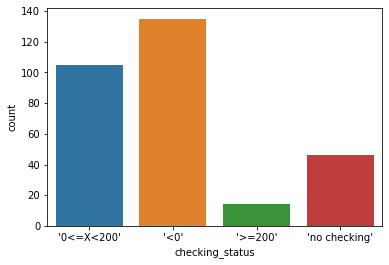

In [12]:
visual_class('checking_status')

Pero podemos hacer algo mejor, crear una clase que vea cada variable categórica en dos: uno para los casos en que el crédito resultó pago, y otro para los casos que resultó moroso. Eso nos va a permitir hacer mejores análisis de las 20 variables involucradas.

In [13]:
def grafica_categorica(target):
    sns.catplot(x=target, col="class", data=creditos, kind="count", aspect=1.2)
    plt.show()

De igual forma, probamos que funcione:

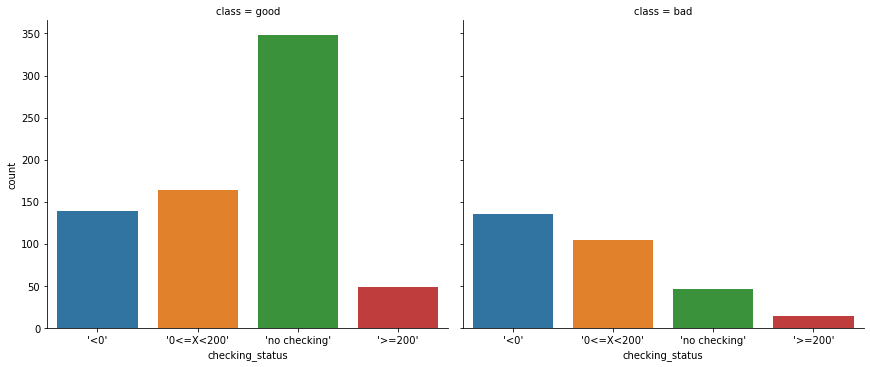

In [14]:
grafica_categorica('checking_status')

Ahora que podemos visualizar datos categóricos, sería bueno ver la distribución de datos numéricos para comparar clases diferentes (en este caso créditos buenos de malos).

In [15]:
def grafica_numerica(target):
    sns.displot(creditos, x=target, hue="class", multiple="stack", aspect=1.2, bins=20)
    plt.show()

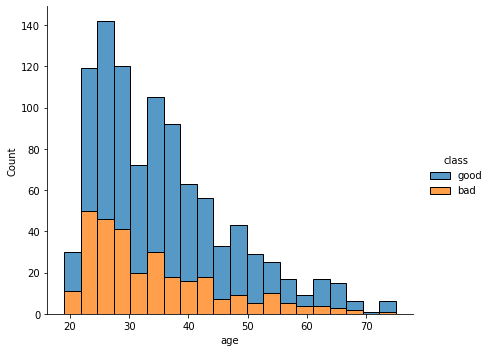

In [16]:
grafica_numerica('age')

# Análisis Visual de las Variables Implicadas
Es probable que de las veinte variables disponibles en el juego de datos, existan algunas donde la diferencia es marcada y tiene una tendencia que apunta a ser parte importante de la razón de los 300 casos de créditos morosos. En nuestro caso, y dado que estamos usando una heurística y no aprendizaje automatizado, inicializamos el valor de referencia en 100.

Procedemos así a evaluar las variables involucradas y determinar su incidencia - o no - en la morosidad. 

## Checking Status
La primera variable a analizar es el estado de crédito del cliente en marcos suizos. 

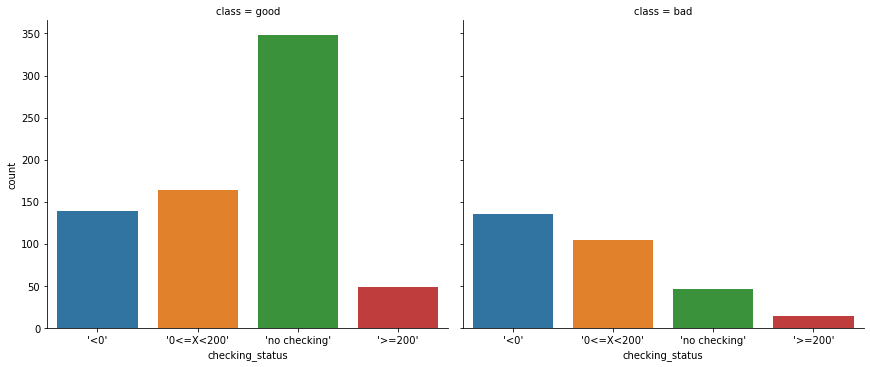

In [17]:
grafica_categorica('checking_status')

Pareciera haber igual posibilidad de incumplir el crédito para aquellos que presentan fondos menores a 200 marcos. Ambas variables cruzan nuestra linea imaginaria de 100. Sin embargo aquellos que no tienen cuenta corriente tienen un muy alto nivel de cumplimiento de pagos. 

## Duration
Analicemos como influye el plazo del crédito en la morosidad.

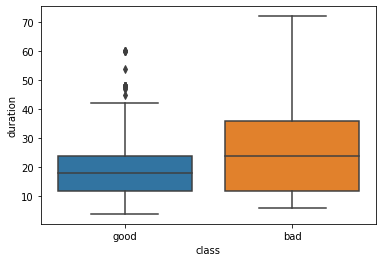

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x="class", y="duration", data=creditos)


Este cuadro no nos dice mucho. Mejor solo analicemos los créditos morosos y veamos una distribución por madurez de los mismos, a ver si un patrón emerge.

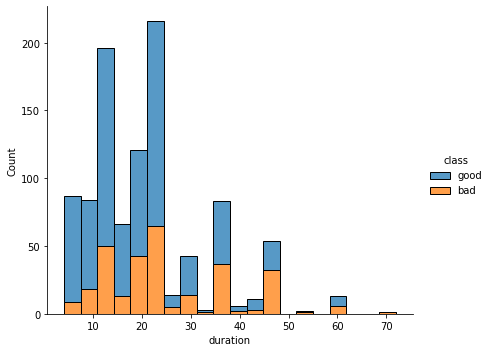

In [19]:
grafica_numerica('duration')

Según el análisis visual, los créditos cortos tienen más probabilidad de convertirse en morosos. Curiosamente a medida que el plazo del crédito aumenta, disminuyen los casos de créditos malos. Pero visto en el contexto de todos los datos, ninguno de los indicados como créditos malos es necesariamente alto en incidencia (solo uno cruza la línea de 50).

## Credit History
El historial de crédito es una variable categórica que podemos analizar y visualizar fácilmente con nuestras funciones. 

In [20]:
analizar('credit_history')

Ocurrencias Negativas de Variable credit_history
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
--> clase  'critical/other existing credit'  es igual a  50
--> clase  'existing paid'  es igual a  169
--> clase  'delayed previously'  es igual a  28
--> clase  'no credits/all paid'  es igual a  25
--> clase       'all paid'  es igual a  28


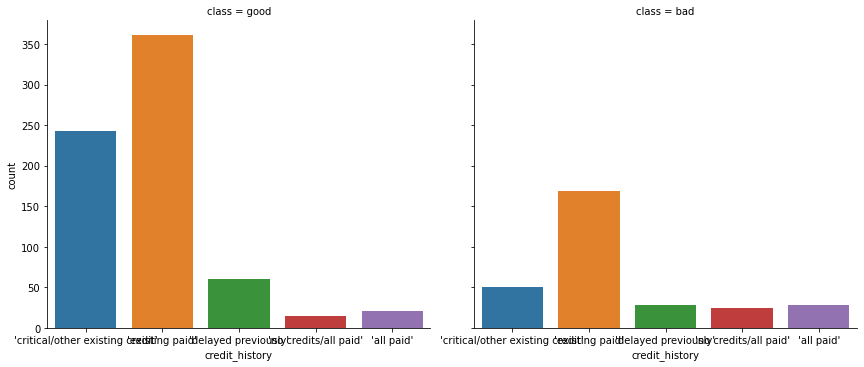

In [21]:
grafica_categorica('credit_history')

Es muy curioso que los casos morosos son con personas que ya han pagado un crédito anterior. Esta variable tiene una proporción de 0.50:1 con el mismo bracket en créditos buenos y debieramos penalizar la función en tal caso. Adicionalmente marca 169 en nuestra línea imaginaria de cruce.

## Purpose
¿Habrá alguna relación entre el propósito del crédito y el nivel de morosidad?

In [22]:
analizar('purpose')

Ocurrencias Negativas de Variable purpose
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
--> clase         radio/tv  es igual a  62
--> clase        education  es igual a  22
--> clase  furniture/equipment  es igual a  58
--> clase        'new car'  es igual a  89
--> clase       'used car'  es igual a  17
--> clase         business  es igual a  34
--> clase  'domestic appliance'  es igual a  4
--> clase          repairs  es igual a  8
--> clase            other  es igual a  5
--> clase       retraining  es igual a  1


Solamente una clase se acerca a nuestra medida de 100 sin llegar, créditos destinados a autos. 

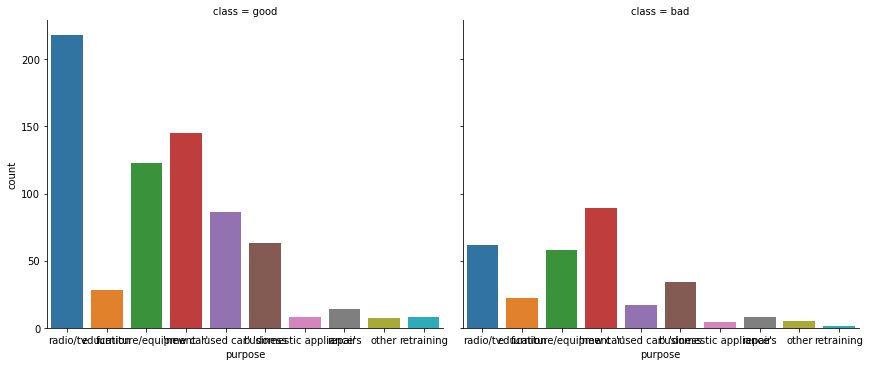

In [23]:
grafica_categorica('purpose')

## Credit Amount
El monto del crédito puede contener información valiosa sobre la incidencia de morosidad. Uno pensaría que la gente incumple en montos grandes y difíciles de pagar en caso de problemas. 

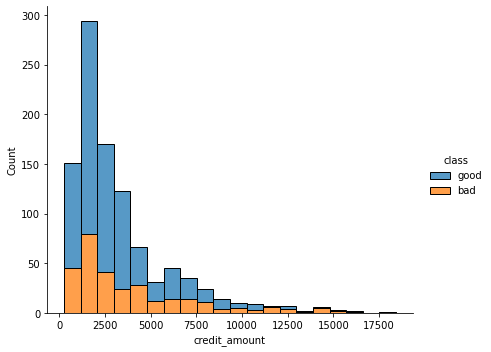

In [24]:
grafica_numerica('credit_amount')

Extrañamente, los créditos por debajo de los 2,500 marcos son los que más la gente incumple, exactamente lo contrario a lo pensado. Pero vistos en el contexto total son muchos más los que se pagan, y ninguno cruza la línea de 100 incidencias. 

## Saving Status
Esta variable - estatus de los ahorros - parece superflua, ya que se asemeja mucho al estatus de la cuenta corriente. 

In [25]:
analizar('savings_status')

Ocurrencias Negativas de Variable savings_status
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
--> clase  'no known savings'  es igual a  32
--> clase           '<100'  es igual a  217
--> clase    '500<=X<1000'  es igual a  11
--> clase         '>=1000'  es igual a  6
--> clase     '100<=X<500'  es igual a  34


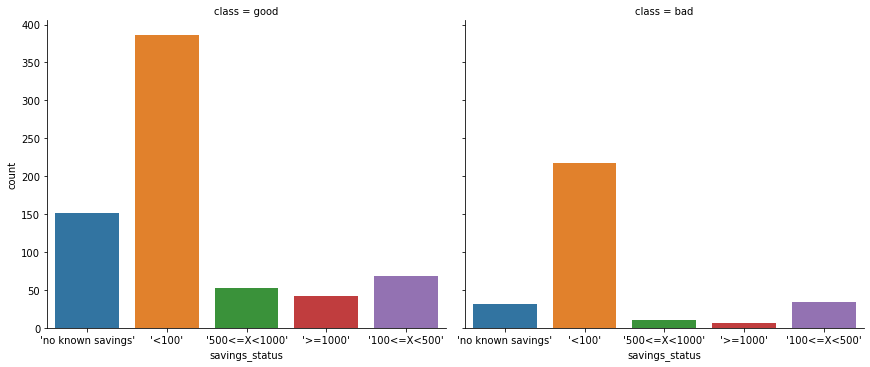

In [26]:
grafica_categorica('savings_status')

Inmediatamente vemos como aquellos clientes con ahorros menores a 100 marcos son los que más incumplen. Sin embargo aquellos sin ahorros tienen un nivel muy bajo de incumplimiento, lo que es un tanto contradictorio. Comparado con aquellos clientes con ahorros de menos de 100 marcos que si pagan, las incidencias de morosidad igual son relativamente grandes, por lo que debemos penalizar este **bracket**. 

## Employment
Uno pensaría que el momento de desempleo es el momento adecuado para pedir un préstamo, y quizás el de más vulnerabilidad para incumplir. Analicemos esta variable. 

In [27]:
analizar('employment')

Ocurrencias Negativas de Variable employment
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
--> clase            '>=7'  es igual a  64
--> clase         '1<=X<4'  es igual a  104
--> clase         '4<=X<7'  es igual a  39
--> clase       unemployed  es igual a  23
--> clase             '<1'  es igual a  70


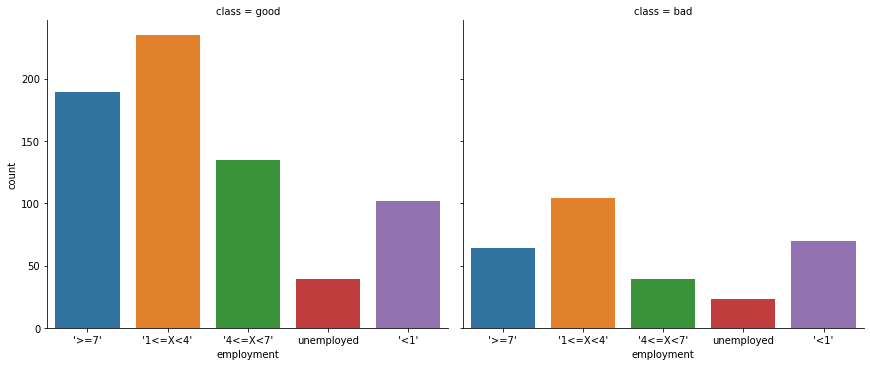

In [28]:
grafica_categorica('employment')

Por alguna razón, el indice más alto de morosidad se da en aquellos trabajadores con más de un año de trabajo pero menos de cuatro. En el caso de los créditos pagos, también son mayoría, pero esta variable cruza nuestra línea de 100, por lo que debemos penalizarla. 

## Installment Commitment
La tasa de pago se representa como el porcentage de retorno por el monto de crédito y nos puede dar luces de si algunas tasas son causal de mayores niveles de morosidad. 

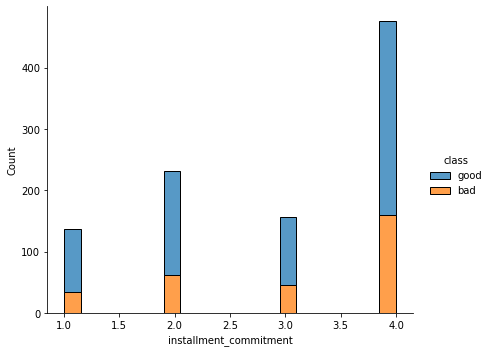

In [29]:
grafica_numerica('installment_commitment')

Es evidente que las tasas de 4.0 son muy proclives a casos de morosidad y créditos malos. Es la única que cruza nuestro umbral de 100 y debe ser penalizada. 

## Personal Status
Veamos como puede afectar la morosidad el estatus personal o marital.

In [30]:
analizar('personal_status')

Ocurrencias Negativas de Variable personal_status
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
--> clase    'male single'  es igual a  146
--> clase  'female div/dep/mar'  es igual a  109
--> clase   'male div/sep'  es igual a  20
--> clase   'male mar/wid'  es igual a  25


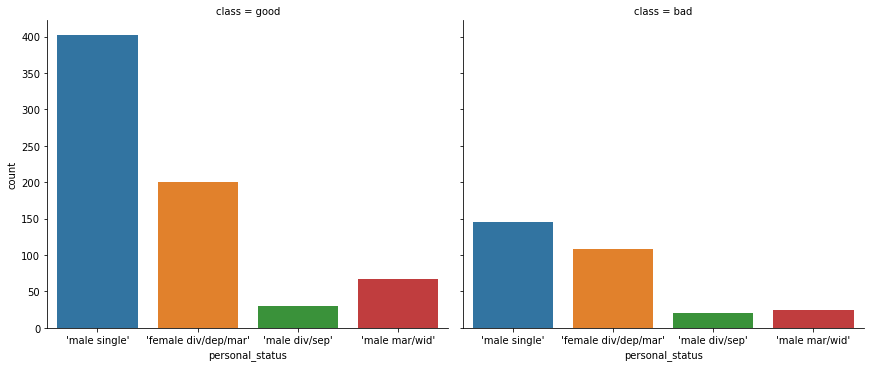

In [31]:
grafica_categorica('personal_status')

Del análisis visual, podemos ver que tanto los hombres solteros como las mujeres de cualquier clase marital son fuertes candidatos a morosidad (**y esto de por si es una regla que raya en lo ilegal, descriminar mujeres como un todo**). Ambas variables deben ser penalizadas. 

## Other Parties
El sentido común dice que créditos con garantes y co-deudores debieran tener mayor cumplimiento que aquellos que no poseen ninguna garantía. 

In [32]:
analizar('other_parties')

Ocurrencias Negativas de Variable other_parties
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
--> clase             none  es igual a  272
--> clase        guarantor  es igual a  10
--> clase   'co applicant'  es igual a  18


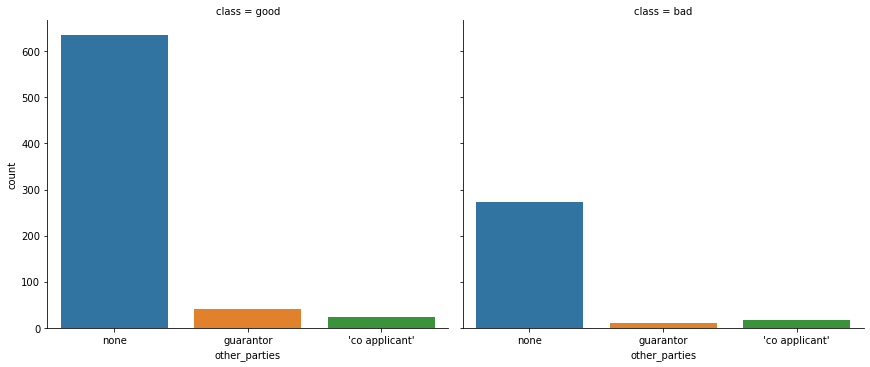

In [33]:
grafica_categorica('other_parties')

El análisis visual determina que aquellas cuentas que no tienen garante son más proclives a incumplir pagos que los que si tienen. Casi una tercera parte incumple por lo tanto esta variable debe ser penalizada.

## Residence Since
Aquellas personas que tienen determinado tiempo de residencia pudieran ser menos proclives a morosidad, ya que tienen cierta estabilidad social. Analicemos el comporamiento de la variable. 

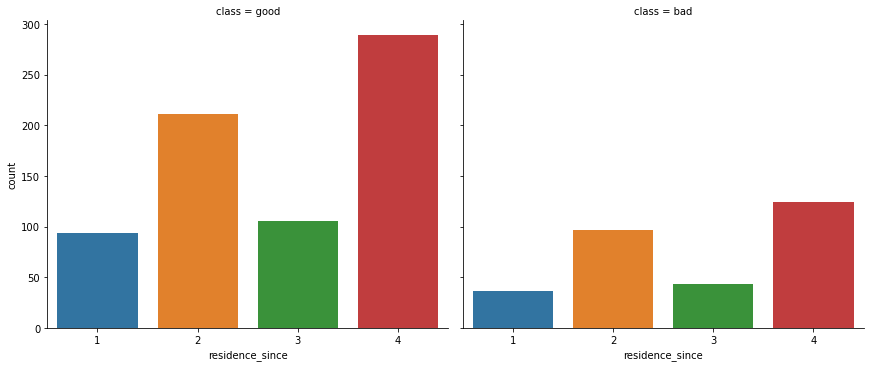

In [34]:
grafica_categorica('residence_since')

Esta gráfica y la de tasa de pago se parecen mucho, y parece contradictorio que aquellos que tienen 4 como tiempo de residencia son los que más incumplen pagos.

## Property Magnitude
Aquellos que tienen propiedad por lo general se consideran mejores sujetos de crédito que aquellos que no la poseen.

In [35]:
analizar('property_magnitude')

Ocurrencias Negativas de Variable property_magnitude
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
--> clase    'real estate'  es igual a  60
--> clase  'life insurance'  es igual a  71
--> clase  'no known property'  es igual a  67
--> clase              car  es igual a  102


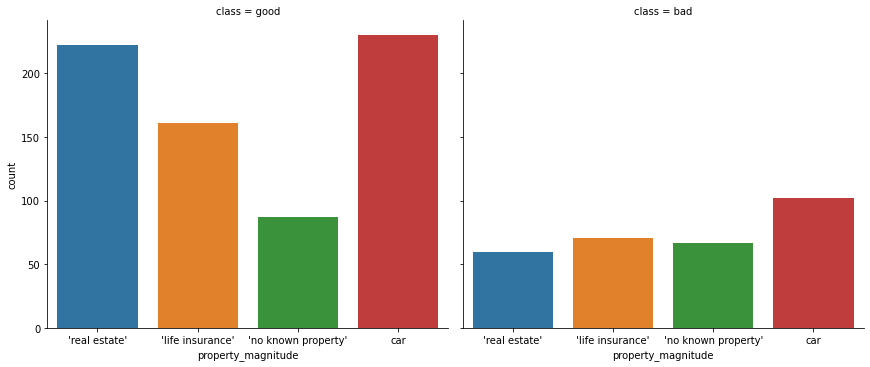

In [36]:
grafica_categorica('property_magnitude')

Aunque extraños, aquellos que poseen un carro son los únicos que tienen una ligera inclinación a la morosidad. Casi un 45% de los que poseen carros tienen créditos morosos. 

## Age
Si la edad trae el juicio en la gente, seguramente aquellos de mayor edad tienen menos incidencia a la morosidad.

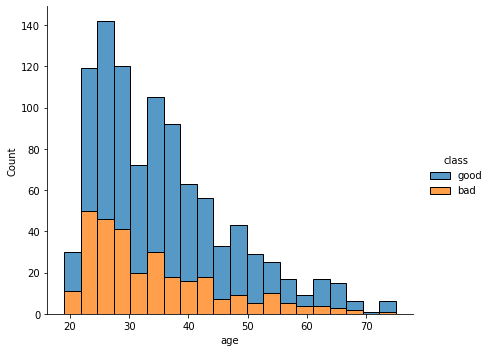

In [37]:
grafica_numerica('age')

Efectivamente los menores de 25 tienen mayor incidencia en la morosidad, pero no es determinante y los casos son menores a 50, por lo que no los consideraremos. 

## Other Payment Plans
La variable `other_payment_plans` indica otros pagos pendientes que pudieran afectar la capacidad de solventar un prestamo. 

In [38]:
analizar('other_payment_plans')

Ocurrencias Negativas de Variable other_payment_plans
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
--> clase             none  es igual a  224
--> clase             bank  es igual a  57
--> clase           stores  es igual a  19


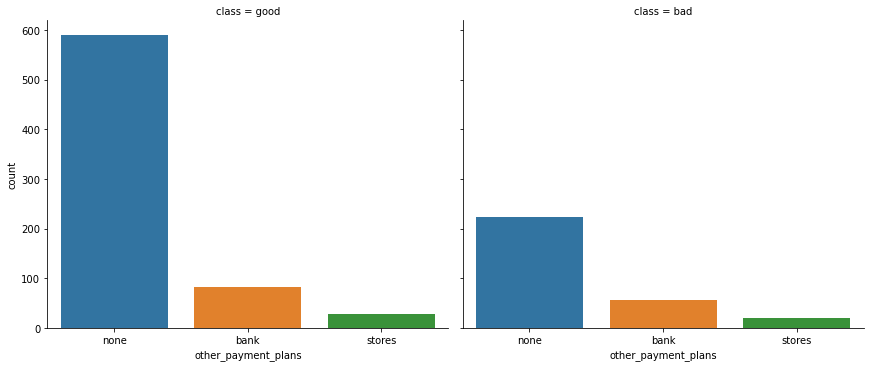

In [39]:
grafica_categorica('other_payment_plans')

Nuevamente, aunque un poco contraintuitivo, aquellos que tienen cero obligaciones adicionales son los que más morosidad aportan. El porcentaje de casos morosos es superior al 33%.

## Housing
¿Qué efecto tiene el tipo de situación de habitación en el pago de la deuda?

In [40]:
analizar('housing')

Ocurrencias Negativas de Variable housing
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
--> clase              own  es igual a  186
--> clase       'for free'  es igual a  44
--> clase             rent  es igual a  70


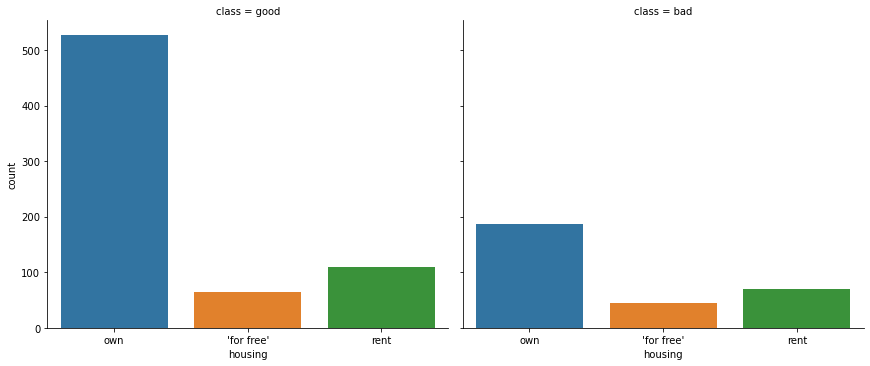

In [41]:
grafica_categorica('housing')

Por alguna razón, aquellas personas que tienen casa son mucho más proclives a caer en morosidad. Hay 186 casos malos de 525 que se pagaron. Por lo tanto debemos penalizar dicha variable.

## Existing Credits
¿Cómo impacta la morosidad la existencia de créditos previos? Analicemos la misma.

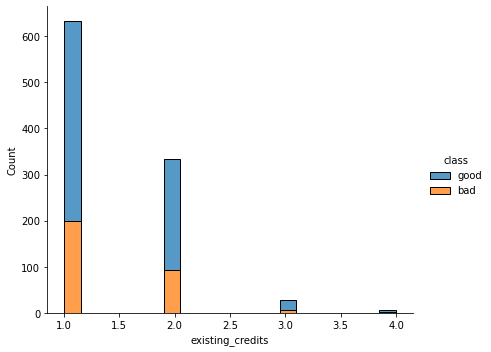

In [42]:
grafica_numerica('existing_credits')

Aparentemente, aquellos que ya tienen un crédito existentes tienen problema pagando dos. Pero los que tienen dos, no parecen tener tanto problema pagando tres (por lo menos no cruzan nuestra linea de 100). 

## Job
La calidad del trabajo seguramente tiene una incidencia importante en la morosidad - o no - del crédito.

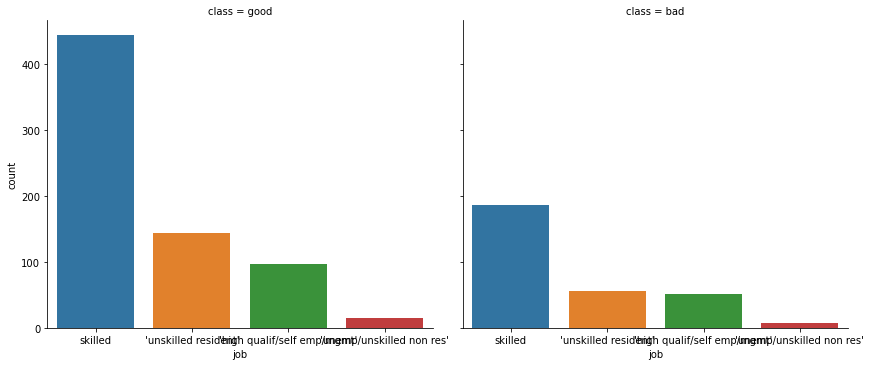

In [43]:
grafica_categorica('job')

Aparentemente, aquellos con calificación de _skilled_ tienen mucha probabilidad de fallar en los pagos, con casi 200 ocurrencias. Es casi la mitad del total que si pagó. 

## Own Telephone
Durante años, los bancos han utilizado la propiedad de una línea de teléfono fijo como señal de buen crédito, y la ausencia de la misma, como mala señal. Veamos que nos indica el juego de datos.

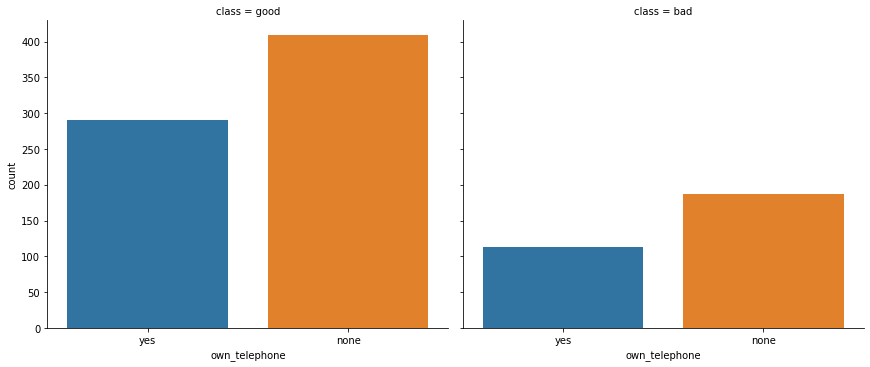

In [44]:
grafica_categorica('own_telephone')

La incidencia no es tan alta como pensada, pero casi 200 créditos malos de 420 con personas que no poseían teléfono es un claro indicador que debemos penalizar. 

## Foreign Worker
Un trabajador extranjero está mucho más expuesto a problemas financieros que uno nacional. Analicemos el comportamiento del juego de datos.

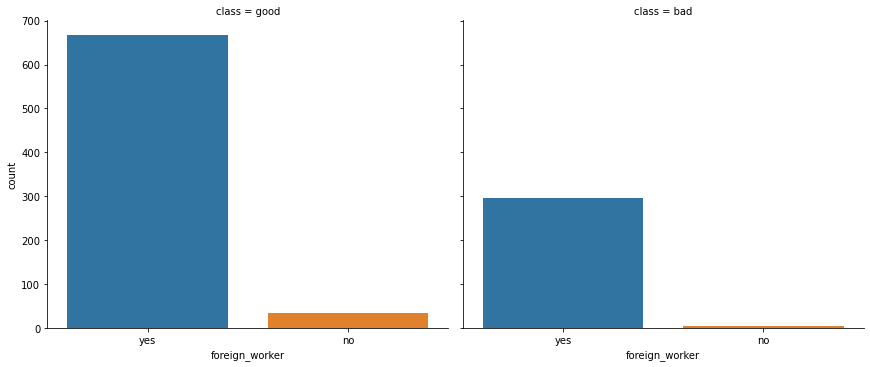

In [45]:
grafica_categorica('foreign_worker')

Lamentablemente, de casi 1000 créditos, 300 que fracasaron corresponden a trabajadores extranjeros. Esta variable debe penalizarse en el modelo por doble. 

# Un Modelo Heurístico
Dado que hemos recaudado mucha información del análisis visual de la data, podemos crear un modelo heurístico, aunque crudo, que reuna información de cada caso y penalice ciertas variables, con un puntaje final. De dicha manera, si el puntaje cruza cierto rango, podemos definir el crédito como bueno o malo, y luego comparar el resultado de la predicción con la realidad. 

In [46]:
# Modelo predictivo

def asignar_puntaje(caso):
    p = 0
    if caso['checking_status'] == "'<0'":p = p + 1
    if caso['checking_status'] == "'0<=X<200'":p = p + 1
    if caso['credit_history'] == "'existing paid'": p = p + 1
    if caso['savings_status'] == "'<100'": p = p + 1
    if caso['employment'] == "'1<=X<4'": p = p + 1
    if caso['installment_commitment'] > 3.5: p = p + 1
    if caso['personal_status'] == "'male single'": p = p + 1
    if caso['personal_status'] == "'female div/dep/mar'": p = p + 1
    if caso['other_parties'] == 'none': p = p + 1
    if caso['residence_since'] > 3: p = p + 1
    if caso['property_magnitude'] == 'car': p = p + 1
    if caso['other_payment_plans'] == 'none': p = p + 1
    if caso['housing'] == 'own': p = p + 1
    if caso['existing_credits'] == 1: p = p + 1
    if caso['job'] == 'skilled': p = p + 1
    if caso['own_telephone'] == 'none': p = p + 1
    if caso['foreign_worker'] == 'yes': p = p + 1
    return(p)

Hagamos una prueba con el primer record para analizar que tan bien podemos evaluar un crédito. 

In [47]:
print(creditos.iloc[1])

checking_status                     '0<=X<200'
duration                                    48
credit_history                 'existing paid'
purpose                               radio/tv
credit_amount                             5951
savings_status                          '<100'
employment                            '1<=X<4'
installment_commitment                       2
personal_status           'female div/dep/mar'
other_parties                             none
residence_since                              2
property_magnitude               'real estate'
age                                         22
other_payment_plans                       none
housing                                    own
existing_credits                             1
job                                    skilled
num_dependents                               1
own_telephone                             none
foreign_worker                             yes
class                                      bad
Name: 1, dtyp

In [48]:
print(asignar_puntaje(creditos.iloc[1]))

12


Hasta aquí y con un poco de _debugging_ podemos identificar exitosamente los casos y dar un puntaje. Pudiéramos armar una función que imprima el registro, otorgue un puntaje, y determine si es un caso potencial de crédito bueno o malo. Vamos a fijar el umbral en 8 puntos (todo aquel que tenga más de 8 puntos es un caso de posible moratoria).

In [49]:
def analisis_credito(target):
    print(target)
    print("Puntaje asignado: ", asignar_puntaje(target), "\n")
    if asignar_puntaje(target) < 8: 
        print("Crédito aprobado!") 
    else:
        print("Crédito RECHAZADO!")

In [50]:
analisis_credito(creditos.iloc[1])

checking_status                     '0<=X<200'
duration                                    48
credit_history                 'existing paid'
purpose                               radio/tv
credit_amount                             5951
savings_status                          '<100'
employment                            '1<=X<4'
installment_commitment                       2
personal_status           'female div/dep/mar'
other_parties                             none
residence_since                              2
property_magnitude               'real estate'
age                                         22
other_payment_plans                       none
housing                                    own
existing_credits                             1
job                                    skilled
num_dependents                               1
own_telephone                             none
foreign_worker                             yes
class                                      bad
Name: 1, dtyp

In [51]:
analisis_credito(creditos.iloc[100])

checking_status                  'no checking'
duration                                    24
credit_history                 'existing paid'
purpose                              'new car'
credit_amount                             1469
savings_status                    '100<=X<500'
employment                               '>=7'
installment_commitment                       4
personal_status                 'male mar/wid'
other_parties                             none
residence_since                              4
property_magnitude               'real estate'
age                                         41
other_payment_plans                       none
housing                                   rent
existing_credits                             1
job                       'unskilled resident'
num_dependents                               1
own_telephone                             none
foreign_worker                             yes
class                                     good
Name: 100, dt

Pudiera ser que 8 es un umbral muy dificil de alcanzar. Probemos dos casos más al azar.

In [52]:
analisis_credito(creditos.iloc[355])

checking_status                     '0<=X<200'
duration                                    24
credit_history                 'existing paid'
purpose                              'new car'
credit_amount                             1246
savings_status                          '<100'
employment                                '<1'
installment_commitment                       4
personal_status                  'male single'
other_parties                             none
residence_since                              2
property_magnitude               'real estate'
age                                         23
other_payment_plans                     stores
housing                                    own
existing_credits                             1
job                       'unskilled resident'
num_dependents                               1
own_telephone                             none
foreign_worker                             yes
class                                      bad
Name: 355, dt

In [53]:
analisis_credito(creditos.iloc[777])

checking_status                           '<0'
duration                                    18
credit_history                 'existing paid'
purpose                               radio/tv
credit_amount                             3509
savings_status                          '<100'
employment                            '4<=X<7'
installment_commitment                       4
personal_status           'female div/dep/mar'
other_parties                        guarantor
residence_since                              1
property_magnitude               'real estate'
age                                         25
other_payment_plans                       none
housing                                    own
existing_credits                             1
job                                    skilled
num_dependents                               1
own_telephone                             none
foreign_worker                             yes
class                                     good
Name: 777, dt

Es difícil ver caso por caso, por lo que vamos a preparar una tabla de confusión automatizando el clasificador. El script para la tabla de confusión cortesia de 

In [78]:
def get_confussion_matrix(umbral):
    predicciones = []
    for i in range(0,1000):
        if asignar_puntaje(creditos.iloc[i]) > umbral:
            predicciones.append("bad")
        else:
            predicciones.append("good")

    import pandas as pd
    y_actu = pd.Series(creditos['class'], name='Actual')
    y_pred = pd.Series(predicciones, name='Predicted')
    df_confusion = pd.crosstab(y_actu, y_pred)
    return(df_confusion)

In [80]:
get_confussion_matrix(8)

Predicted,bad,good
Actual,,
bad,218,82
good,461,239


Probemos con un umbral menor, por ejemplo 6:

In [81]:
get_confussion_matrix(6)

Predicted,bad,good
Actual,,
bad,292,8
good,665,35


Con un umbral de 6 estamos arrojando demasiados falsos positivos (créditos que predecimos como malos que en la vida real son buenos). Subamos el umbral.

In [82]:
get_confussion_matrix(10)

Predicted,bad,good
Actual,,
bad,108,192
good,162,538


In [87]:
get_confussion_matrix(12)

Predicted,bad,good
Actual,,
bad,19,281
good,19,681


Dado nuestra pequeña fórmula heurística no admite mucha variación, hagamos una función que aplique los costos de errores y determine cual de todos nuestros umbrales es el mejor. 

# Evaluando Costos de Modelos Heurísticos
Vamos a evaluar la puntuación de un modelo heurístico usando la tabla de costos determinada en el problema. 
![](CPresumen1.png)

In [89]:
def get_puntaje(matriz):
    puntaje = (matriz.iloc[0,0] * 0) + (matriz.iloc[0,1] * 5) + (matriz.iloc[1,0] * 1) + (matriz.iloc[1,1] * 0)
    return(puntaje)

Hagamos la prueba con valores del 6 al 10 (lo vamos a hacer a mano porque no es mucho código).

In [90]:
print("Umbral  6 arroja puntaje: ", get_puntaje(get_confussion_matrix(6)))
print("Umbral  7 arroja puntaje: ", get_puntaje(get_confussion_matrix(7)))
print("Umbral  8 arroja puntaje: ", get_puntaje(get_confussion_matrix(8)))
print("Umbral  9 arroja puntaje: ", get_puntaje(get_confussion_matrix(9)))
print("Umbral 10 arroja puntaje: ", get_puntaje(get_confussion_matrix(10)))
print("Umbral 11 arroja puntaje: ", get_puntaje(get_confussion_matrix(11)))
print("Umbral 12 arroja puntaje: ", get_puntaje(get_confussion_matrix(12)))

Umbral  6 arroja puntaje:  705
Umbral  7 arroja puntaje:  773
Umbral  8 arroja puntaje:  871
Umbral  9 arroja puntaje:  979
Umbral 10 arroja puntaje:  1122
Umbral 11 arroja puntaje:  1263
Umbral 12 arroja puntaje:  1424


# Conclusión
Obviamente, un modelo heurístico donde la proporción de penalización sea cinco a uno por falsos positivos tiene poca oportunidad de prosperar y castiga a un porcentaje mucho más grande de créditos buenos clasificados como malos de lo necesario. Sin embargo hemos comprobado con el ejercicio como utilizar reglas de visualización manteniendo consistencia en las mismas para tomar decisiones en la construcción de un modelo heurístico que otorga puntos de manera sencilla y puede ser evaluado con una función de costos. 